In [2]:
pip install ucimlrepo

# **Data Acquisition & Exploratory Data Analysis (EDA)**

#### **Dataset Loading**

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

**Combine features and target into a single DataFrame for analysis**

In [4]:
import pandas as pd

df = X.copy()
df['target'] = y['num']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### **Basic Dataset Inspection**

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Observations -**

303 samples, 13 features + 1 target

Mix of categorical and numerical features

Missing values present in ca and thal

#### **Target Variable Understanding**

The target num ranges from 0 to 4.
As per dataset documentation, we convert it to binary classification:

0 → No heart disease

1-4 → Heart disease present

In [8]:
df['target'] = (df['target'] > 0).astype(int)
df['target'].value_counts()


,count
target,
0,164
1,139


#### **Missing Value Analysis**

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#### **Handling Missing Values**

In [10]:
# Numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical features
cat_cols = df.select_dtypes(include=['object']).columns

In [11]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

/tmp/ipython-input-1200089458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
/tmp/ipython-input-1200089458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

#### **Exploratory Visualizations**

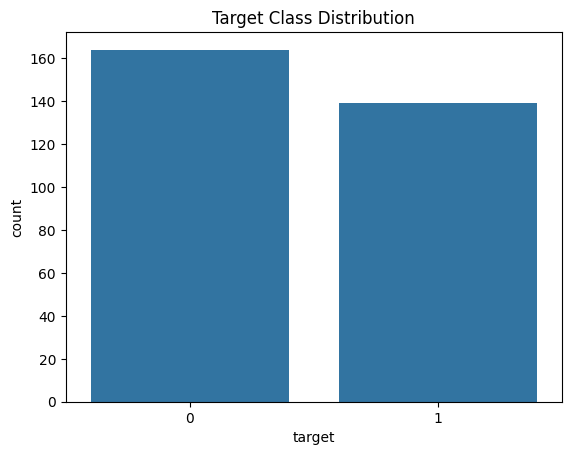

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

**Observation:**

Dataset is reasonably balanced, suitable for standard classifiers.

**Feature Distributions**

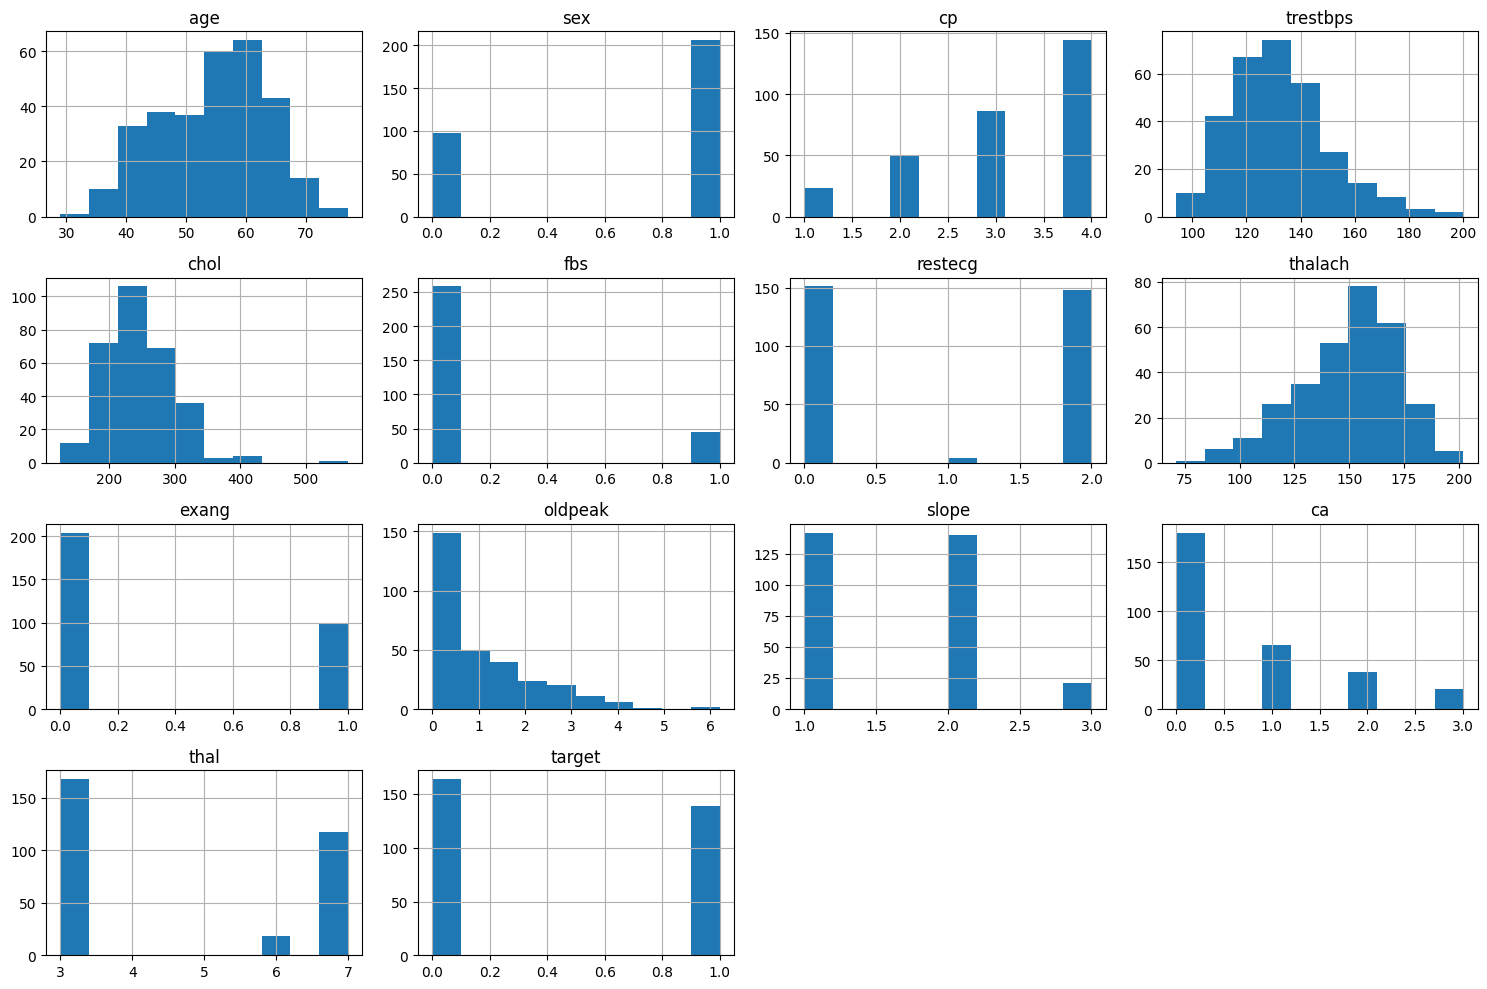

In [13]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# **Feature Engineering & Model Development**

#### **Train-Test Split**

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### **Feature Encoding & Scaling (Pipeline)**

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'
]

categorical_features = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

#### **Model 1 - Logistic Regression (Baseline)**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

#### **Model 2 - Random Forest**

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=200,
                                        random_state=42))])

#### **Model Evaluation**

In [18]:
from sklearn.metrics import classification_report, roc_auc_score

#Logistic Regression
y_pred_lr = log_reg_pipeline.predict(X_test)
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

ROC-AUC: 0.9577922077922079


In [19]:
#Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

ROC-AUC: 0.9545454545454546


#### **Cross-Validation (Required by Rubric)**

In [20]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(log_reg_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
cv_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='roc_auc')

print("Logistic Regression CV ROC-AUC:", cv_lr.mean())
print("Random Forest CV ROC-AUC:", cv_rf.mean())

Logistic Regression CV ROC-AUC: 0.8995062103757755
Random Forest CV ROC-AUC: 0.891474387126561


**Summary:**

Logistic Regression was used as an interpretable baseline model and demonstrated strong discriminative performance with a test ROC-AUC of 0.96 and the highest cross-validated ROC-AUC, indicating better generalization.

Random Forest captured non-linear feature interactions and achieved slightly higher test accuracy (0.89), but showed marginally lower cross-validation ROC-AUC, suggesting mild overfitting.

Given the comparable performance, Logistic Regression was preferred for its stability and interpretability, while Random Forest serves as a strong non-linear alternative.

Due to its comparable performance, better cross-validation stability, and simpler deployment characteristics, Logistic Regression is selected as the primary candidate for production, with Random Forest retained as a benchmark model.